# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
      
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | crane
Processing Record 6 of Set 1 | makhjan
Processing Record 7 of Set 1 | manacapuru
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | qiziltepa
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | firuzabad
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | ulsteinvik
Processing Record 19 of Set 1 | phan rang-thap cham
Processing Record 20 of Set 1 | kutulik
Processing Record 21 of 

SSLError: HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?q=crucecita&appid=3d6bbaea9eeec0de4c6eaf67839a7c7f (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)')))

In [ ]:
# Convert the cities weather data into a Pandas DataFrame                      
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yambio,4.5721,28.3955,293.31,93,49,228,SS,1701570802
1,aasiaat,68.7098,-52.8699,260.24,86,33,99,GL,1701570803
2,alofi,-19.0595,-169.9187,303.09,62,20,70,NU,1701570803
3,howard springs,-12.4970,131.0470,299.10,74,100,156,AU,1701570804
4,qaqortoq,60.7167,-46.0333,272.01,74,100,45,GL,1701570556


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

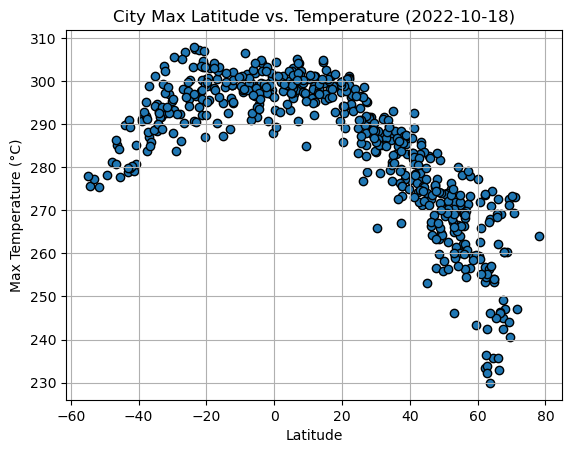

In [5]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)') 
plt.grid()

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

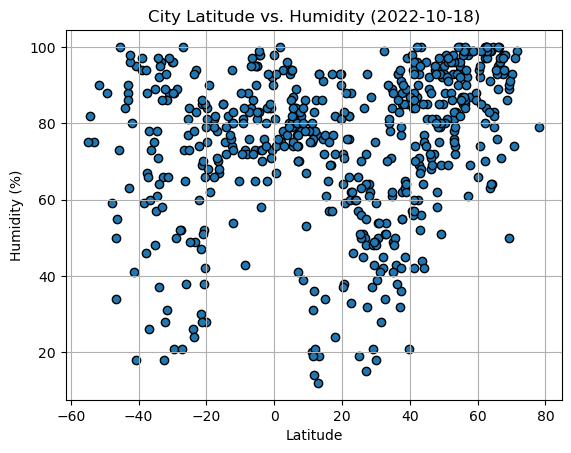

In [6]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

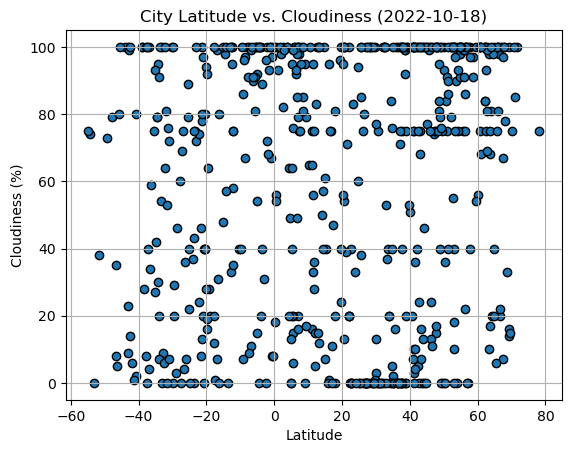

In [7]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

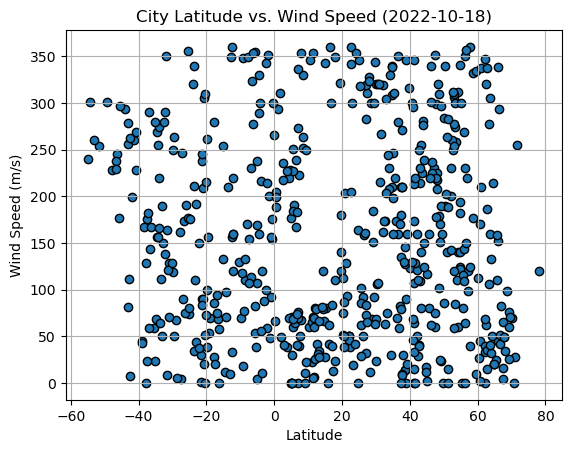

In [8]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def lin_regree_plot_func(x_values, y_values, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    regressed_values = (slope * x_values) + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regressed_values, color='r')
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    correlation_coefficient = f'The r-value is: {rvalue}'
    return correlation_coefficient
    print(correlation_coefficient)
    plt.show()

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yambio,4.5721,28.3955,293.31,93,49,228,SS,1701570802
1,aasiaat,68.7098,-52.8699,260.24,86,33,99,GL,1701570803
4,qaqortoq,60.7167,-46.0333,272.01,74,100,45,GL,1701570556
5,nemuro,43.3236,145.5750,277.49,56,16,255,JP,1701570806
8,kapa'a,22.0752,-159.3190,301.14,82,20,50,US,1701570808


In [12]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,alofi,-19.0595,-169.9187,303.09,62,20,70,NU,1701570803
3,howard springs,-12.4970,131.0470,299.10,74,100,156,AU,1701570804
6,nelson bay,-32.7167,152.1500,299.31,66,9,150,AU,1701570806
7,quellon,-43.1167,-73.6167,278.87,88,9,256,CL,1701570687
9,grytviken,-54.2811,-36.5092,275.67,82,74,301,GS,1701570809


###  Temperature vs. Latitude Linear Regression Plot

'The r-value is: -0.8807359020841868'

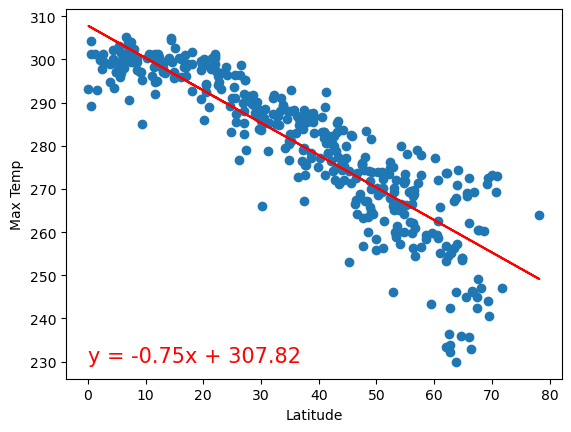

In [41]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Max Temp")

'The r-value is: 0.6360589349985989'

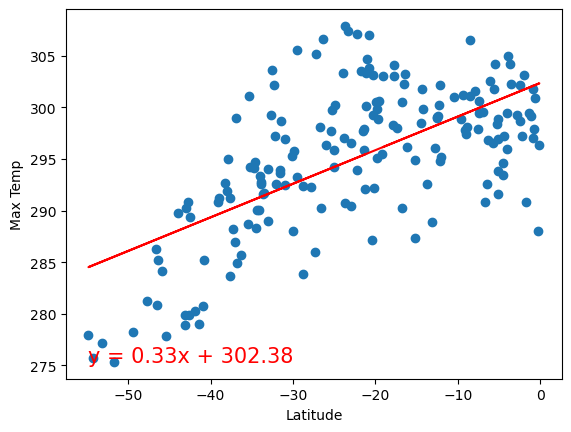

In [42]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Max Temp")

**Discussion about the linear relationship:** The linear relationships in the above two plots show that the temperature is high near the equator. While temperature decreases if we move away from the equator.

### Humidity vs. Latitude Linear Regression Plot

'The r-value is: 0.34635329869444414'

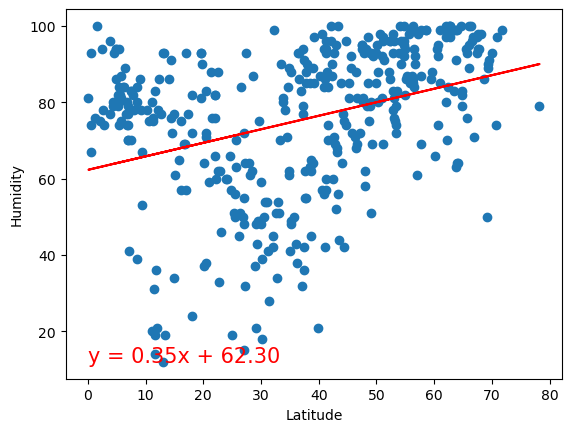

In [43]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Humidity")

'The r-value is: 0.1684516501893048'

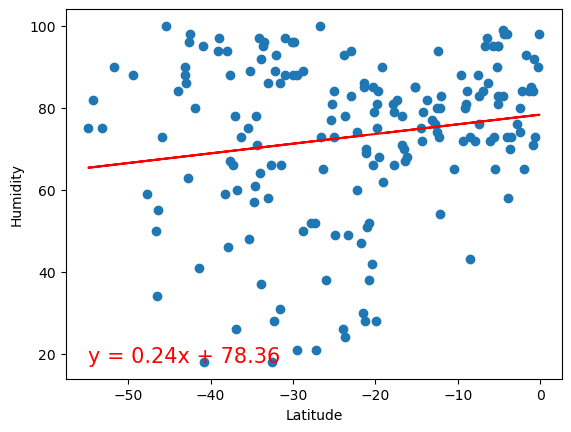

In [44]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

'The r-value is: 0.1546546628646958'

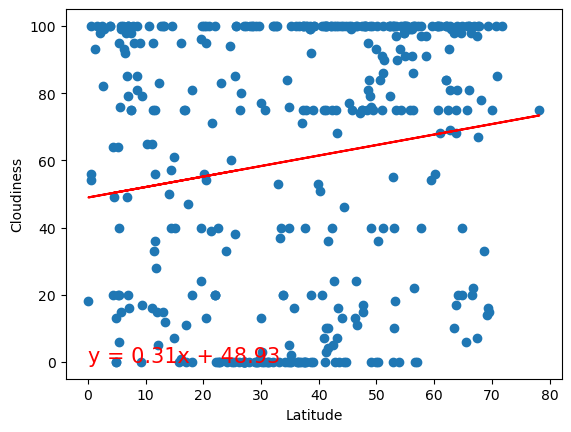

In [45]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Cloudiness")

'The r-value is: 0.18759301752444363'

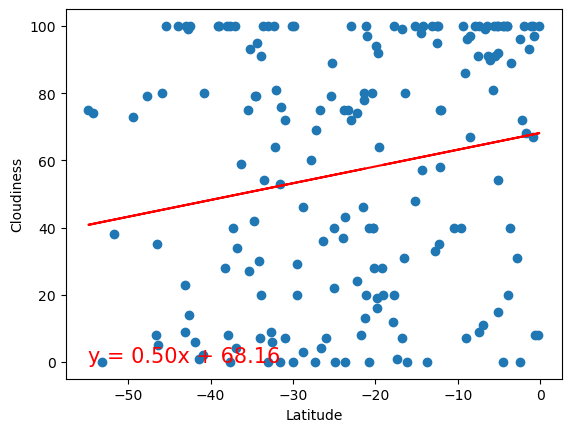

In [46]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

'The r-value is: 0.03653516995663482'

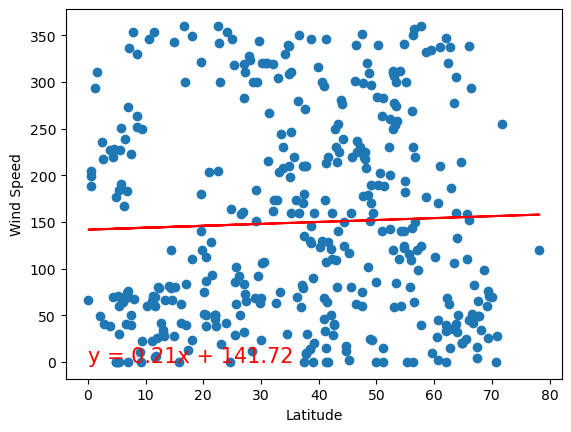

In [48]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Wind Speed")

'The r-value is: -0.08312489951091812'

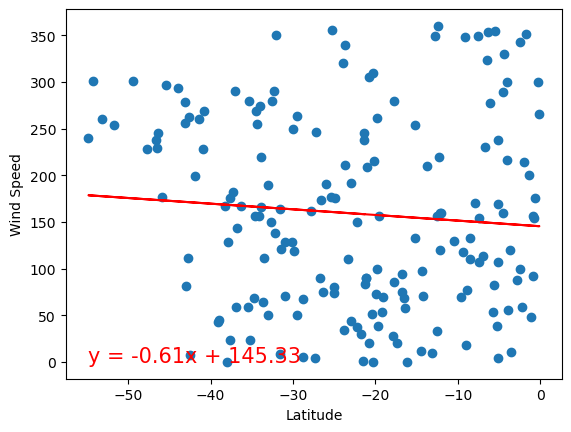

In [49]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE